In [1]:
import pandas as pd
import numpy as np
import scipy as sp

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.close('all')
plt.rcParams['figure.figsize'] = [11,6]

In [3]:
last_reported_sunday='2020-09-20'

In [4]:
df = pd.read_csv("turnstile_daily_counts_2020.csv",header=0,parse_dates=True, index_col='date', low_memory=False)
df

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits
date,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-21,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9236.0,8155.0
2020-09-22,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9578.0,8248.0
2020-09-23,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9772.0,8283.0


In [5]:
counts = df.groupby('date')['entries'].sum() # returns a Series

In [6]:
max_weekly_ridership = 34368521

In [7]:
# # date of ridership min and max
# counts.idxmin(),counts.min(), counts.idxmax(),counts.max()

In [8]:
# weekly rider totals -- peak week = 34368521
weekly_totals = counts.resample('W-MON').sum()

In [9]:
s_daily=counts.truncate(before=counts.idxmin(), after=pd.Timestamp(last_reported_sunday))

## daily entries from April 12 low

<AxesSubplot:xlabel='date'>

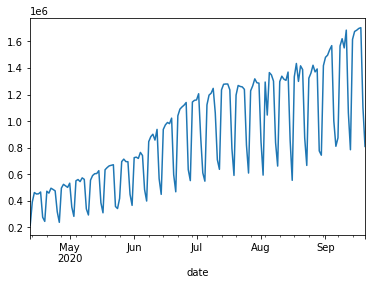

In [10]:
s_daily.plot()

## by week

<AxesSubplot:xlabel='date'>

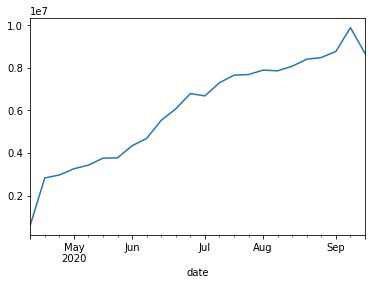

In [11]:
s_weekly = s_daily.resample('W-MON').sum()
s_weekly.plot()
# interpolated = s_weekly.interpolate(method='spline', order=2)
# interpolated.plot()

## 2020

In [12]:
# 2020
end_2020=pd.Timestamp('2020-12-31')
#end_2020=pd.Timestamp('2020-12-28')
s_weekly_2020 = s_weekly # make working copy
weekly_index2020 = pd.date_range(counts.idxmin(), end_2020, freq='W-MON') # create new index
s_weekly_2020 = s_weekly_2020.reindex(weekly_index2020) # reindex with new index
s_weekly_2020.interpolate() # interpolate
s_weekly_2020 = s_weekly_2020.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2020)])) # populate final value
x2020 = s_weekly_2020.interpolate(method='linear') # interpolate


## 2021

In [13]:
# 2021
end_2021=pd.Timestamp('2021-12-31')
s_weekly_2021 = s_weekly # make working copy
weekly_index2021 = pd.date_range(counts.idxmin(), end_2021, freq='W-MON') # create new index
s_weekly_2021 = s_weekly_2021.reindex(weekly_index2021) # reindex with new index
s_weekly_2021.interpolate() # interpolate
s_weekly_2021 = s_weekly_2021.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2021)])) # populate final value
x2021 = s_weekly_2021.interpolate(method='linear') # interpolate


## 2022

In [14]:
# 2022
end_2022=pd.Timestamp('2022-12-31')
s_weekly_2022 = s_weekly # make working copy
weekly_index2022 = pd.date_range(counts.idxmin(), end_2022, freq='W-MON') # create new index
s_weekly_2022 = s_weekly_2022.reindex(weekly_index2022) # reindex with new index
s_weekly_2022.interpolate() # interpolate
s_weekly_2022 = s_weekly_2022.append(pd.Series([max_weekly_ridership], index=[pd.Timestamp(end_2022)])) # populate final value
x2022 = s_weekly_2022.interpolate(method='linear') # interpolate


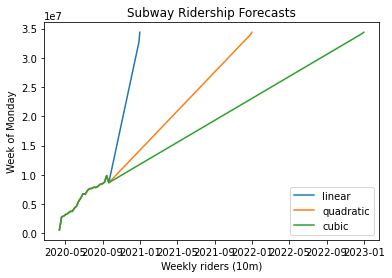

In [15]:
plt.plot(x2020, label='linear')
plt.plot(x2021, label='quadratic')
plt.plot(x2022, label='cubic')

plt.xlabel('Weekly riders (10m)')
plt.ylabel('Week of Monday')

plt.title("Subway Ridership Forecasts")

plt.legend()

plt.show()

# machine learning model

<AxesSubplot:xlabel='date'>

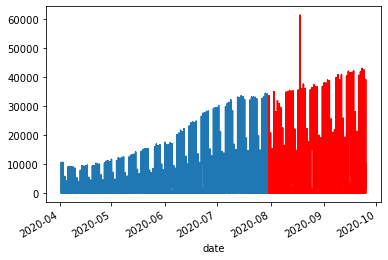

In [17]:
# test - train split
df['entries'].loc['2020-04-02':'2020-07-31'].plot(kind='line')
df['entries'].loc['2020-07-31':].plot(kind='line', color='r')

In [20]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19',
               '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23',
               '2020-09-24', '2020-09-25'],
              dtype='datetime64[ns]', name='date', length=119249, freq=None)

In [24]:
# create data features
import datetime
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofyear'] = df.index.dayofyear
df['weekofyear'] = df.index.isocalendar().week

# ------------------------stopped working here------------------------

In [ ]:
# make dummies
df = pd.get_dummies(df, columns=['year'], drop_first=True, prefix='year')

df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')

df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')

df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')

df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')

df.info()

In [ ]:
# partition the data
train = df[df["Class"] == "Train"] 
test = df[df["Class"] == "Test"] 

print(train.shape)
print(test.shape)

In [ ]:
# drop unneeded columns
train = train.drop(['Class'], axis = 1) 
test = test.drop(['Class'], axis = 1) 

In [ ]:
# create arrays

target_column_train = ['Sales'] 
predictors_train = list(set(list(train.columns))-set(target_column_train))

X_train = train[predictors_train].values
y_train = train[target_column_train].values

print(X_train.shape)
print(y_train.shape)


target_column_test = ['Sales'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

X_test = test[predictors_test].values
y_test = test[target_column_test].values

print(X_test.shape)
print(y_test.shape)



In [ ]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# continue building model using 
# https://www.pluralsight.com/guides/machine-learning-for-time-series-data-in-python
# OR
# https://srome.github.io/Dealing-With-Trends-Combine-a-Random-Walk-with-a-Tree-Based-Model-to-Predict-Time-Series-Data/

In [ ]:
# extrapolate the model